<a href="https://colab.research.google.com/github/Adammalik28/machine_learning/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Import libraries tambahan yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

Bagian yang Disesuaikan untuk insurance.csv

In [ ]:
print("--- Memuat dan Memproses Data Asuransi ---")

--- Memuat dan Memproses Data Asuransi ---


Membaca dataset

In [ ]:
try:
    df = pd.read_csv('insurance.csv')
except FileNotFoundError:
    print("❌ Error: File 'insurance.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()


Menampilkan dimensi dan pratinjau dataset

In [ ]:
print(f"Dimensi dataset: {df.shape}")
df.head()

Dimensi dataset: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Menghitung kuartil untuk bins

 Membuat Label Kategorikal dari 'charges'

Menghitung kuartil untuk bins

In [ ]:
bins = df['charges'].quantile([0, 0.25, 0.50, 0.75, 1.0]).tolist()
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

SOLUSI: Tambahkan duplicates='drop' untuk mengatasi KeyError

In [ ]:
df['Biaya_Kategori'] = pd.cut(
    df['charges'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop'
)

Encoding Label Target (y)

In [ ]:
le = LabelEncoder()
df['Biaya_Kategori_Encoded'] = le.fit_transform(df['Biaya_Kategori'])
y = df['Biaya_Kategori_Encoded']

print("Kolom 'Biaya_Kategori' berhasil dibuat.")

Kolom 'Biaya_Kategori' berhasil dibuat.


Menentukan Fitur (X)

In [ ]:
X = df.drop(['charges', 'Biaya_Kategori', 'Biaya_Kategori_Encoded'], axis=1)

 Kolom Kategorikal dan Numerikal

In [ ]:
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

 One-Hot Encoding untuk Fitur Kategorikal (Menggantikan Ordinal Encoder)

In [ ]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

Scaling Fitur Numerik

In [ ]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

 Cek missing values (Sama seperti template)

In [ ]:
print("\nCek missing values:")
print(df.isnull().sum())


Cek missing values:
age                       0
sex                       0
bmi                       0
children                  0
smoker                    0
region                    0
charges                   0
Biaya_Kategori            0
Biaya_Kategori_Encoded    0
dtype: int64


split X and y into training and testing sets (Sama seperti template)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)

 Penanganan Imbalance (SMOTE) pada training set

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

check the shape of X_train and X_test (Sama seperti template)

In [ ]:
print(f"\nShape X_train (resampled): {X_train_resampled.shape}, X_test: {X_test.shape}")


Shape X_train (resampled): (896, 8), X_test: (442, 8)


 KODE DECISION TREE CLASSIFIER (Gini Index)

In [ ]:
print("\n" + "="*50)
print("1. DECISION TREE CLASSIFIER (Gini Index)")
print("="*50)


1. DECISION TREE CLASSIFIER (Gini Index)


instantiate the DecisionTreeClassifier model with criterion gini index

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) # Max depth dibatasi 5 untuk visualisasi

 fit the model

In [ ]:
clf_gini.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

 Prediksi

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_train_gini = clf_gini.predict(X_train_resampled)

Menampilkan Skor (Sama seperti template)

In [ ]:
print('Model accuracy score with criterion gini index (Test): {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_resampled, y_pred_train_gini)))

Model accuracy score with criterion gini index (Test): 0.8258
Training-set accuracy score: 0.9040


Visualisasi Pohon (Menggantikan graphviz)

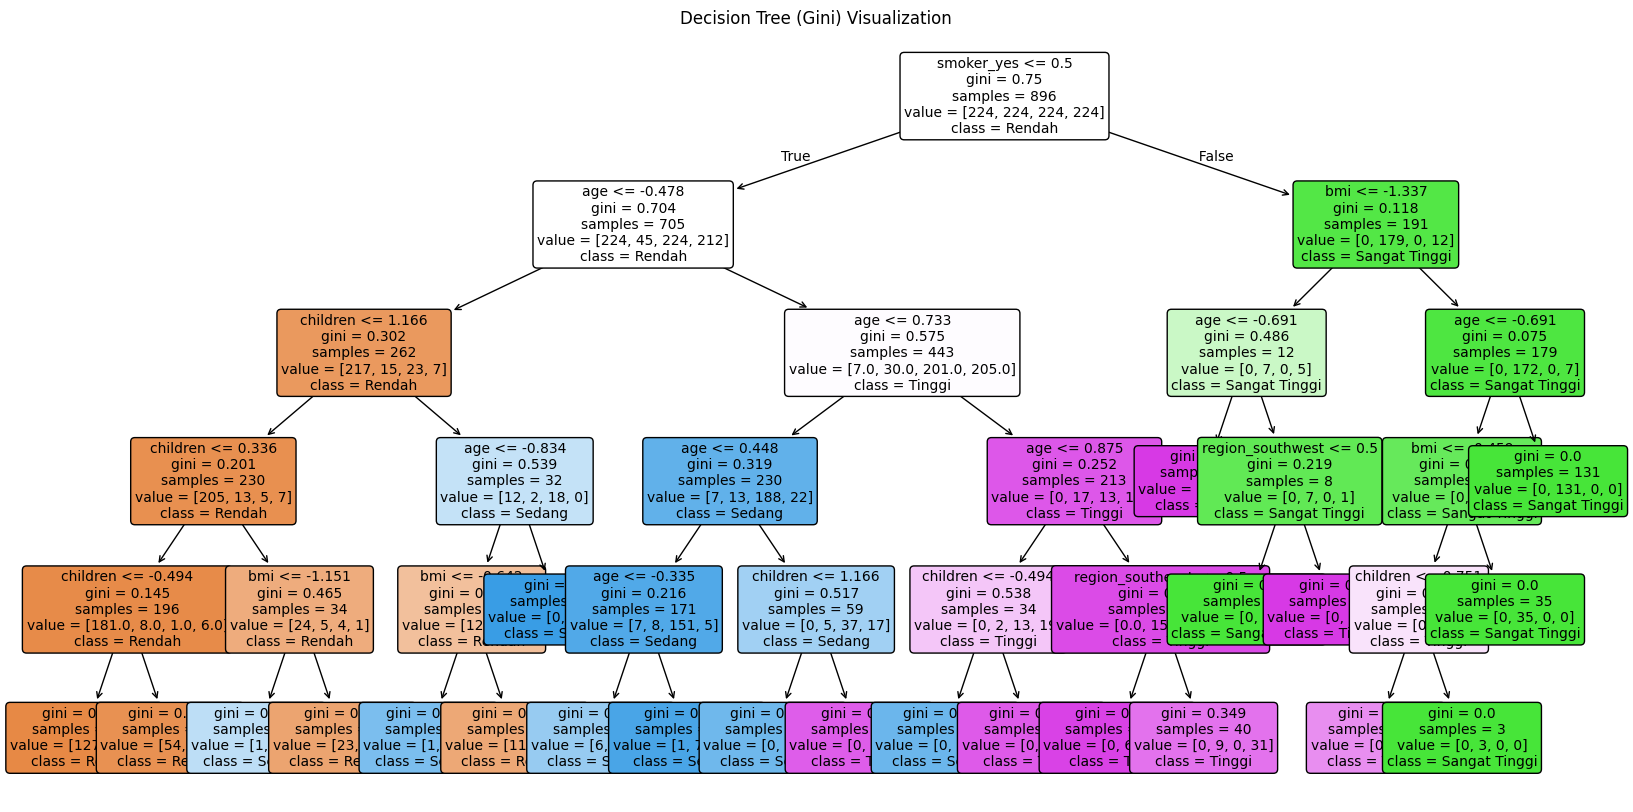

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf_gini, feature_names=X.columns.tolist(), class_names=le.classes_.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree (Gini) Visualization')
plt.show()

Print the Confusion Matrix (Sama seperti template)

In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
print('\nConfusion matrix (Gini)\n\n', cm_gini)
print(classification_report(y_test, y_pred_gini, target_names=le.classes_))


Confusion matrix (Gini)

 [[ 99   0  12   0]
 [ 12  72   7  20]
 [  7   0 100   3]
 [  2   0  14  94]]
               precision    recall  f1-score   support

       Rendah       0.82      0.89      0.86       111
Sangat Tinggi       1.00      0.65      0.79       111
       Sedang       0.75      0.91      0.82       110
       Tinggi       0.80      0.85      0.83       110

     accuracy                           0.83       442
    macro avg       0.85      0.83      0.82       442
 weighted avg       0.85      0.83      0.82       442



KODE DECISION TREE CLASSIFIER (Entropy

In [ ]:
print("\n" + "="*50)
print("2. DECISION TREE CLASSIFIER (Entropy)")
print("="*50)


2. DECISION TREE CLASSIFIER (Entropy)


 instantiate the DecisionTreeClassifier model with criterion entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42) # Max depth dibatasi 5

 fit the model

In [ ]:
clf_en.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

 Prediksi

In [ ]:
y_pred_en = clf_en.predict(X_test)
y_pred_train_en = clf_en.predict(X_train_resampled)

 Menampilkan Skor (Sama seperti template)

In [ ]:
print('Model accuracy score with criterion entropy (Test): {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_resampled, y_pred_train_en)))

Model accuracy score with criterion entropy (Test): 0.8281
Training-set accuracy score: 0.8873


 Visualisasi Pohon (Menggantikan graphviz)

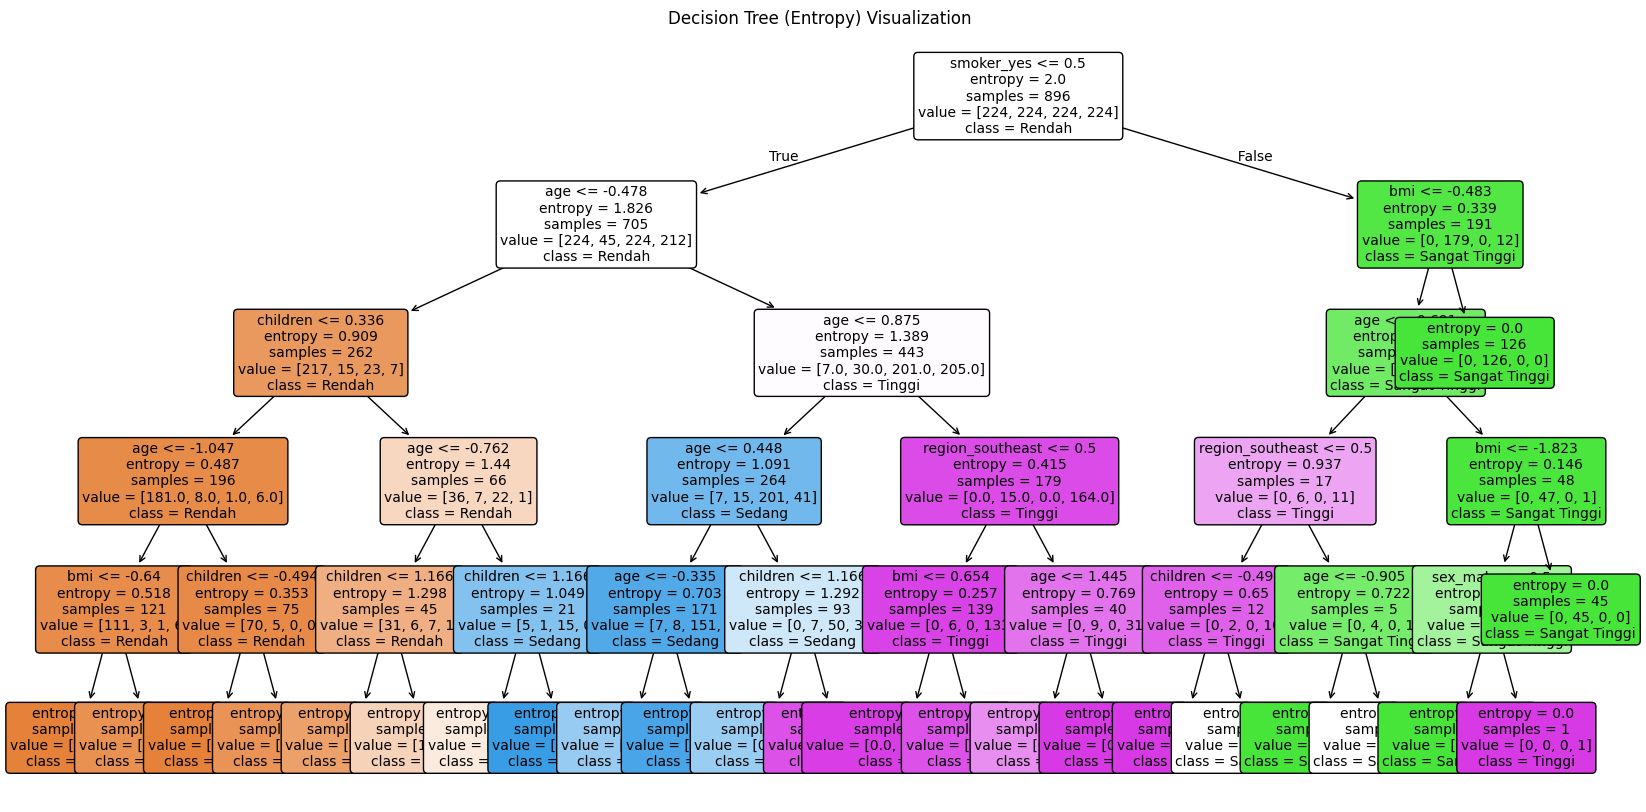

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf_en, feature_names=X.columns.tolist(), class_names=le.classes_.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree (Entropy) Visualization')
plt.show()

Print the Confusion Matrix (Sama seperti template)

In [ ]:
cm_en = confusion_matrix(y_test, y_pred_en)
print('\nConfusion matrix (Entropy)\n\n', cm_en)
print(classification_report(y_test, y_pred_en, target_names=le.classes_))


Confusion matrix (Entropy)

 [[106   0   5   0]
 [ 12  75   8  16]
 [  7   0 101   2]
 [  3   4  19  84]]
               precision    recall  f1-score   support

       Rendah       0.83      0.95      0.89       111
Sangat Tinggi       0.95      0.68      0.79       111
       Sedang       0.76      0.92      0.83       110
       Tinggi       0.82      0.76      0.79       110

     accuracy                           0.83       442
    macro avg       0.84      0.83      0.83       442
 weighted avg       0.84      0.83      0.83       442



KODE NAIVE BAYES CLASSIFIER (Tambahan)

In [ ]:
print("\n" + "="*50)
print("3. NAIVE BAYES CLASSIFIER")
print("="*50)


3. NAIVE BAYES CLASSIFIER


 instantiate the GaussianNB model

In [ ]:
nb_model = GaussianNB()

 fit the model

In [ ]:
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

 Prediksi

In [ ]:
y_pred_nb = nb_model.predict(X_test)
y_pred_train_nb = nb_model.predict(X_train_resampled)

 Menampilkan Skor

In [ ]:
print('Model accuracy score (Test): {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_resampled, y_pred_train_nb)))

Model accuracy score (Test): 0.6448
Training-set accuracy score: 0.6786


Print the Confusion Matrix

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print('\nConfusion matrix (Naive Bayes)\n\n', cm_nb)
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


Confusion matrix (Naive Bayes)

 [[103   0   8   0]
 [ 11  76  24   0]
 [  4   0 106   0]
 [  4   7  99   0]]
               precision    recall  f1-score   support

       Rendah       0.84      0.93      0.88       111
Sangat Tinggi       0.92      0.68      0.78       111
       Sedang       0.45      0.96      0.61       110
       Tinggi       0.00      0.00      0.00       110

     accuracy                           0.64       442
    macro avg       0.55      0.64      0.57       442
 weighted avg       0.55      0.64      0.57       442

